## The Central Limit Theorem

>It states that if we take any sample data and take its mean multiple times and plot it. It will always be a normal curve. No matter the same of the original data frame its mean taken over multiple samples will always form a normal distribution. 

> Its width defined by the standard distribution.

> For the creation of normal curve you need two things:
    >1. Mean of the data
    >2. Standard deviation(s) of the value (which decides the spread of the graph)

> Small s will have a more steep curve while high s will have more spread out curve.

> Minimumn 30 sample size is needed to plot a normal curve.

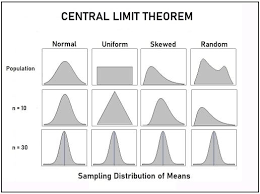

> We derive the sample assuming that it will have same probability distribution behaviour as the population. The one with high value will repeat more than the low value.
> We always try to estimate Population parameters and with that we calculate with how much confidence we have with this estimates.

In [ ]:
CONFIDENCE INTERVAL

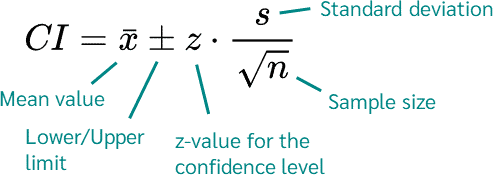

>A 95% CI is an interval that covers 95% of the means.

> S/sqrt(n) is also called the standard error. It measures the uncertainty in the sample mean. More sample less the uncertainty and viceversa. Standard error is related to mean.

>We follow 68 | 95 |99.7 rule Where 1 SD covers 68%, 2 SD covers 95%, 3 SD covers 99.7% of the region. In this case Z value is taken as 2 for 95% CI.
 

Requirement for testing is that traget data - It should be normally distributed.

Hypothesis testing - (1. Normality test, 2. Coreelation test, 3. Other test (Parametric test, Non-parametric test, stationary test)

Normal distribution can be tested either analytically or graphically. The most common analytical tests to check data for normal distribution are the:
1) Kolmogorov-Smirnov Test
2) Shapiro-Wilk Test
3) Anderson-Darl Test

>>st
For the graphical test either a histogram or the Q-Q plot is used. Q-Q stands for Quantile Quantile Plot, it compares the actual observed distribution and the expected theoretical distribution

In [1]:
import pandas as pd
WineData = pd.read_csv("winequality-red.csv")

In [2]:
WineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


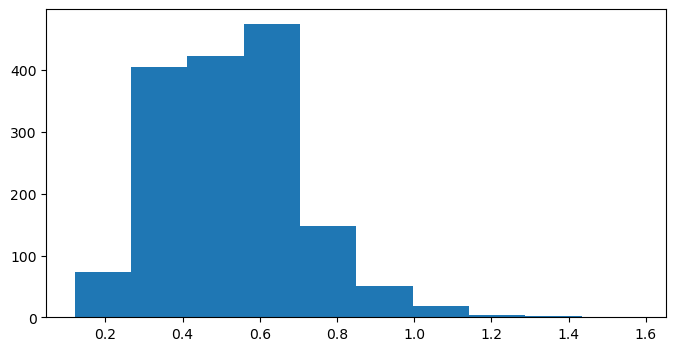

In [6]:
#Checking Histogram
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,4))
plt.hist(WineData['volatile acidity'])
plt.show()

In [12]:
from scipy.stats import shapiro

Datatotest = WineData['volatile acidity']
stat, p = shapiro(Datatotest)
print(stat, p)

0.9743338823318481 2.686385373947307e-16


In [11]:
if p<=0.05:
    print("Data is not normally distributed")
else:
    print("Data is normally distributed")

Data is not normally distributed


In [14]:
from numpy.random import randn
data = randn(100)

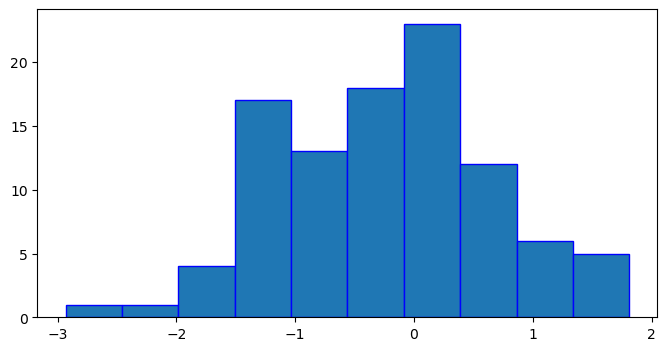

In [18]:
plt.figure(figsize=(8,4))
plt.hist(data, edgecolor ='b')
plt.show()

In [21]:
from scipy.stats import shapiro

stat, p = shapiro(data)
print("stat=%.2f, p=%.30f" %(stat, p))

stat=0.99, p=0.839071452617645263671875000000


In [30]:
from scipy.stats import normaltest
Datatotest = WineData['volatile acidity']

stat, p = normaltest(Datatotest)
print("stat=%.2f, p=%.30f " %(stat,p))

if p<=0.05:
    print("Not normal dist")
else:
    print("Normal")

stat=143.42, p=0.000000000000000000000000000000 
Not normal dist


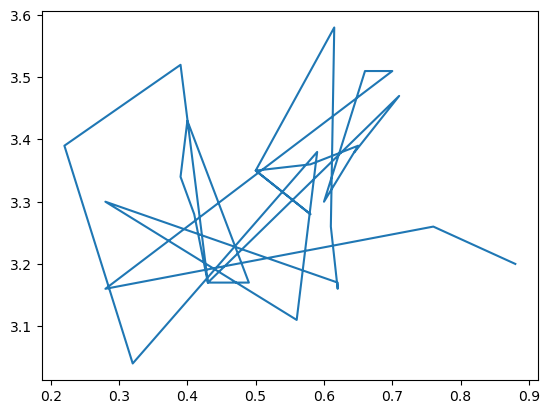

In [33]:
First_sample = WineData[1:30]['volatile acidity']
second_sample = WineData[1:30]['pH']

plt.plot(First_sample,second_sample)
plt.show()

In [39]:
from scipy.stats import spearmanr
stat , p = spearmanr(First_sample,second_sample)

print("stat = %.2f, p=%.10f" %(stat,p))

if p> 0.05:
    print("independant sample")
else:
    print("dependant sample")

stat = 0.20, p=0.3013571162
independant sample


In [40]:
from scipy.stats import pearsonr
stat , p = pearsonr(First_sample,second_sample)

print("stat = %.2f, p=%.10f" %(stat,p))

if p> 0.05:
    print("independant sample")
else:
    print("dependant sample")

stat = 0.18, p=0.3604658377
independant sample


In [45]:
WineData[1:30].corr(method = "pearson")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.325296,0.553331,0.064789,0.145997,0.369643,0.351803,0.558823,-0.554355,0.176146,-0.014915,0.232732
volatile acidity,-0.325296,1.000000,-0.808892,0.086848,-0.086997,-0.046489,-0.045020,-0.018832,0.176232,-0.058765,-0.116946,-0.323907
citric acid,0.553331,-0.808892,1.000000,0.163451,0.302150,0.273691,0.356156,0.321183,-0.402765,0.404090,0.247358,0.246825
residual sugar,0.064789,0.086848,0.163451,1.000000,-0.069497,0.278564,0.580704,0.524667,-0.011351,0.074962,0.358012,-0.324054
chlorides,0.145997,-0.086997,0.302150,-0.069497,1.000000,0.226563,0.211043,0.118830,-0.601472,0.644596,-0.342212,-0.037891
free sulfur dioxide,0.369643,-0.046489,0.273691,0.278564,0.226563,1.000000,0.854553,0.430067,-0.204240,0.156305,0.056671,0.120759
total sulfur dioxide,0.351803,-0.045020,0.356156,0.580704,0.211043,0.854553,1.000000,0.523186,-0.280118,0.210051,0.229037,-0.112902
density,0.558823,-0.018832,0.321183,0.524667,0.118830,0.430067,0.523186,1.000000,-0.181546,0.300643,-0.089917,-0.249689
pH,-0.554355,0.176232,-0.402765,-0.011351,-0.601472,-0.204240,-0.280118,-0.181546,1.000000,-0.539957,0.232744,0.007259
sulphates,0.176146,-0.058765,0.404090,0.074962,0.644596,0.156305,0.210051,0.300643,-0.539957,1.000000,-0.172364,-0.120335


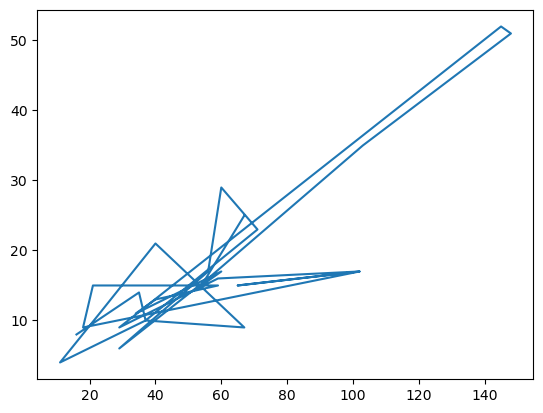

In [48]:
#Above graph show high correlation between total and free sulfur dioxide. Anyhting above 80% is higly correlated.

First_sample = WineData[1:30]['total sulfur dioxide']
second_sample = WineData[1:30]['free sulfur dioxide']

plt.plot(First_sample,second_sample)
plt.show()

In [49]:
from scipy.stats import pearsonr
stat , p = pearsonr(First_sample,second_sample)

print("stat = %.2f, p=%.10f" %(stat,p))

if p> 0.05:
    print("independant sample")
else:
    print("dependant sample")

stat = 0.85, p=0.0000000037
dependant sample


## CHI SQUARE TEST

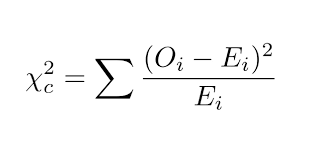

In [50]:
f1 = pd.read_csv('test.csv')
f1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [492]:
fd = pd.crosstab(f1['Education'], f1['Self_Employed'], margins = False)
fd

Self_Employed,No,Yes
Education,,
Graduate,237,29
Not Graduate,70,8


In [499]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected  = chi2_contingency(fd)
expected

array([[237.38953488,  28.61046512],
       [ 69.61046512,   8.38953488]])

In [520]:
#observed value
observed = fd.values
observed

array([[237,  29],
       [ 70,   8]], dtype=int64)

In [527]:
for o,e in zip(observed,expected):
    print(o)
    print(e)

[237  29]
[237.38953488  28.61046512]
[70  8]
[69.61046512  8.38953488]


In [529]:
from scipy.stats import chi2
import numpy as np
chi_sq = sum([(o-e)**2./e for o,e in zip(observed,expected)])
chi_stats = chi_sq[0]+chi_sq[1]
chi_stats

0.02620907541188698

In [506]:
critical_value = chi2.ppf(q=1-0.05, df =dof) 
critical_value

3.841458820694124

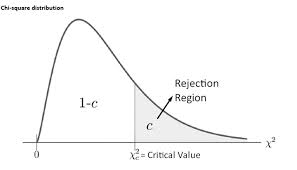

In [504]:
from scipy.stats import chi2_contingency
stat, p, dof, expected  = chi2_contingency(fd)
if p > 0.05:
    print("independent")
else:
    print("dependent")

independent


In [66]:
# if values of Gradudate and non-graduate shows certain propotion with Yes and no respectively. Then they are dependant in nature.
#In gratudate self employed Yes is 5 times of No and in Not graduate No is 2 times of Yes. There is correlation with Education.
fd = [[20,100],[1000,500]]
fd

[[20, 100], [1000, 500]]

In [73]:
from scipy.stats import chi2_contingency
stat, p, dof, expected  = chi2_contingency(fd)
if p > 0.05:
    print("independent")
else:
    print("dependent p=%.30f" %p )

dependent p=0.000000000000000000000000002895


## T Test

In [78]:
import numpy as np
my_score = [23,45,37,24,28,45,27,55,25,16]
V_score = [33,55,67,34,78,54,62,55,45,63]
print(np.mean(my_score))
print(np.mean(V_score))

32.5
54.6


In [88]:
#One Sample t-test
from scipy.stats import ttest_1samp
stat, p = ttest_1samp(my_score,31)
print("p=%.10f" %p)

p=0.7106117445


In [89]:
# Independent t-test
import scipy
scipy.stats.ttest_ind(my_score,V_score)

TtestResult(statistic=-3.711563809729271, pvalue=0.0015969934307188882, df=18.0)

In [93]:
#A paired sample t_test
my_score2 = [23,45,37,24,48,45,27,45,25,16]
print(np.mean(my_score2))

33.5


In [94]:
scipy.stats.ttest_rel(my_score,my_score2)
#scores are highly related with cfi of 95%

TtestResult(statistic=-0.42857142857142855, pvalue=0.6783097418055798, df=9)

## ANOVA

In [96]:
tstat , p  = scipy.stats.f_oneway(my_score,my_score2, V_score)
print(tstat , p)

9.490883242316201 0.0007559699280104791


In [409]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [447]:
dav = pd.read_csv('between-group-anova-data.csv')
dav.head()

,Group,Stress_score
0,University students,2
1,University students,2
2,University students,2
3,University students,3
4,University students,1


In [455]:
model = ols('Stress_score~Group', data = dav).fit()
aov_table = sm.stats.anova_lm(model, type=2)
print(aov_table)

            df        sum_sq       mean_sq           F        PR(>F)
Group      2.0  40442.242424  20221.121212  178.050323  2.271490e-17
Residual  30.0   3407.090909    113.569697         NaN           NaN


In [449]:
if aov_table['PR(>F)'].values[0]<0.05:
    print('Groups are same')
else:
    print('Groups are different')
# Looking at the F-stats table we can reject the null hypothesis. Not sure why here P values is different here.

Groups are same


In [412]:
# to know which group is different we run POST-HOC test

In [457]:
pair_t  = model.t_test_pairwise('Group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
General population-A-Level students,71.181818,4.544121,15.664596,5.508156e-16,61.901485,80.462151,1.101631e-15,True
University students-A-Level students,-5.818182,4.544121,-1.280376,2.102247e-01,-15.098515,3.462151,2.102247e-01,False
University students-General population,-77.000000,4.544121,-16.944971,6.578844e-17,-86.280333,-67.719667,1.973653e-16,True


## Benferroni Correction

In [462]:
# We see General population has p>|t| values high wrt other group and so we reject the null hupothesis for those pair. 
#However there is not much difference between University students and A level students

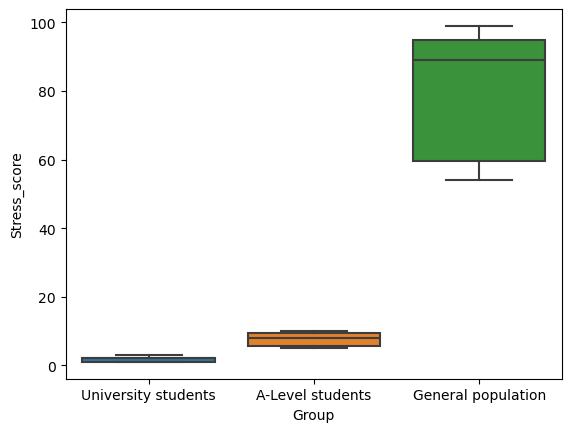

In [460]:
import seaborn as sns
ax= sns.boxplot(x='Group',y='Stress_score', data = dav)

## 2-WAY ANOVA 

In [463]:
dd = pd.read_csv('ToothGrowth.csv')
dd.head()

,rownames,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


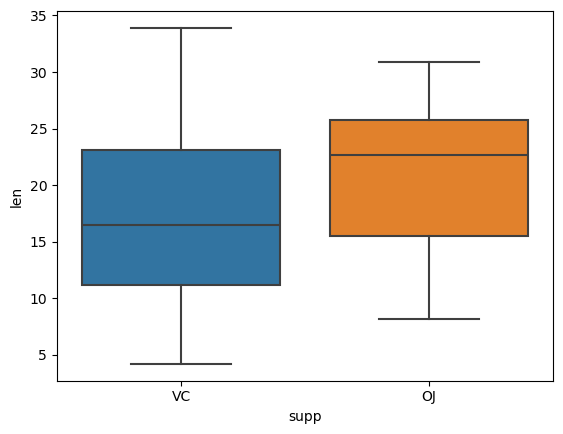

In [473]:
import statsmodels.api as  sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import seaborn as sns
ax = sns.boxplot(x='supp', y='len', data =dd)

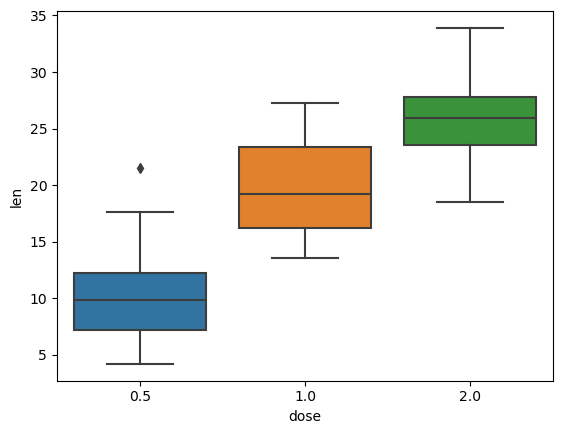

In [466]:
ax = sns.boxplot(x='dose', y='len', data =dd)

C:\Users\Akash Patil\anaconda3\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The provided callable <function mean at 0x000001FB8A3704A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


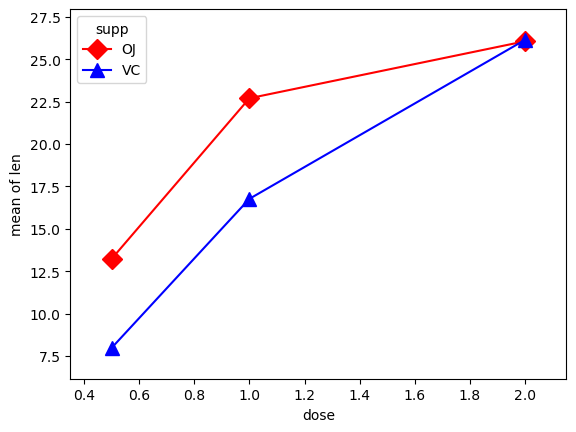

In [476]:
fig = interaction_plot(dd.dose, dd.supp, dd.len, colors = ['red','blue'], markers=['D','^'], ms = 10) 

In [478]:
formula = 'len ~ supp + dose + supp*dose'
model = ols(formula,dd).fit()

aov_table = anova_lm(model,typ=2)
aov_table

In [486]:
np.round(aov_table['PR(>F)'].values,5)

array([0.00089, 0.     , 0.02463,     nan])

## Linear Regression

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [199]:
pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5588 sha256=da10d8ac70180eeb6612109fa69230a8098870b5b214753dd768e47bce01f88a
  Stored in directory: c:\users\akash patil\appdata\local\pip\cache\wheels\cd\ef\ae\073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [98]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from word2number import w2n

In [99]:
df = pd.read_csv('area_price2.csv')

In [100]:
df.shape

(8, 4)

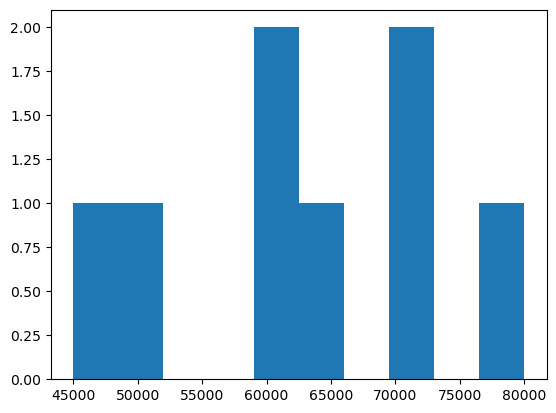

In [101]:
plt.hist(df['salary($)'])
plt.show()

In [102]:
df['experience'] = df['experience'].fillna('zero')

In [103]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)

In [104]:
df['experience'] = df['experience'].apply(w2n.word_to_num)

In [105]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [106]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [107]:
reg.intercept_

14992.65144669314

In [108]:
reg.predict([[2,9,6]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [252]:
reg.predict([[12,10,10]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

In [253]:
import pickle

In [254]:
with open('my_model', 'wb') as f:
    pickle.dump(reg,f)

In [255]:
with open('my_model','rb') as f:
    cd = pickle.load(f)

In [258]:
cd.predict([[3,4,8]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49824.55542105])

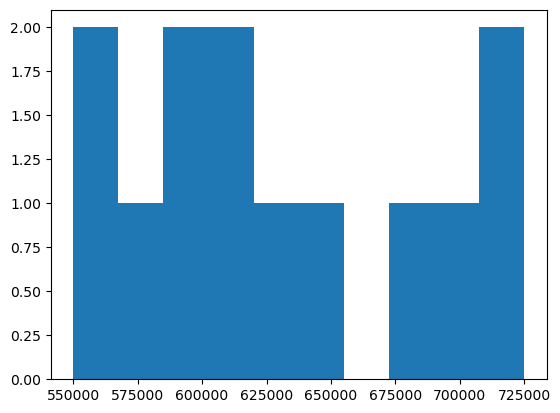

In [110]:
df1 = pd.read_csv('homeprices.csv')
df1.shape
plt.hist(df1['price'])
plt.show()

In [111]:
dd = pd.get_dummies(df1.town, dtype = 'int')

In [112]:
mm = pd.concat([df1, dd], axis =1)
mm

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [113]:
mm.drop(['west windsor'], axis =1,  inplace=True)

In [114]:
mm.head() 

,town,area,price,monroe township,robinsville
0,monroe township,2600,550000,1,0
1,monroe township,3000,565000,1,0
2,monroe township,3200,610000,1,0
3,monroe township,3600,680000,1,0
4,monroe township,4000,725000,1,0


In [119]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [123]:
x = mm.drop(['price'], axis=1)
y= mm.price

In [124]:
reg.fit(x,y)

ValueError: could not convert string to float: 'monroe township'

In [288]:
reg.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [291]:
reg.predict(np.array([2800,0,1]).reshape(-1,3))

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [292]:
reg.predict(np.array([3300,0,0]).reshape(-1,3))

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([668551.92431735])

In [294]:
reg.score(x,y)

0.9573929037221873

In [295]:
df2 = pd.read_csv('carprices.csv')

In [296]:
df2.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [300]:
fd = pd.get_dummies(df2['Car Model'], dtype ='int')

In [301]:
mer = pd.concat([df2,fd], axis =1)

In [305]:
mer.drop(['Car Model', 'Mercedez Benz C class'], axis =1, inplace = True)

In [307]:
mer

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [310]:
x = mer.drop(['Sell Price($)'], axis=1)
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [313]:
y = mer['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [315]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [316]:
model.score(x,y)

0.9417050937281083

In [317]:
model.predict([[45000,4,0,0]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [318]:
model.predict([[86000,7,0,1]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

Train test data

In [319]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x = df['experience']
x.head(2)

0    0
1    0
Name: experience, dtype: int64

In [127]:
y= df['salary($)']
y.head(2)

0    50000
1    45000
Name: salary($), dtype: int64

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 1)

In [129]:
x_test

7    11
2     5
Name: experience, dtype: int64

#Logistic Regrssion

In [130]:
df4 = pd.read_csv('insurance_data.csv')

<Axes: xlabel='age', ylabel='bought_insurance'>

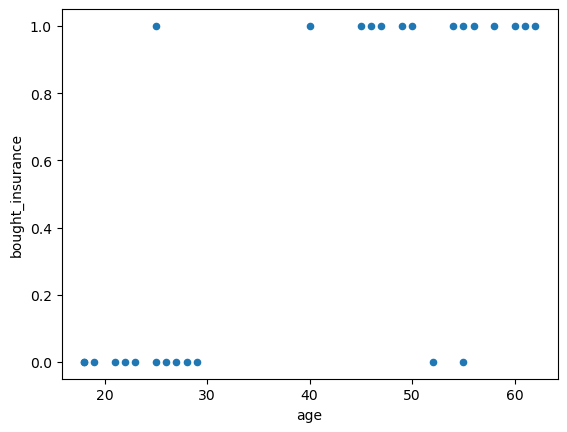

In [131]:
df4.plot(kind ='scatter', x='age', y='bought_insurance')

In [132]:
df4.shape

(27, 2)

In [133]:
from sklearn import linear_model

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train, x_test, y_train, y_test = train_test_split(df4[['age']], df4.bought_insurance, test_size = 0.2)

In [136]:
x_test.shape

(6, 1)

In [137]:
reg = linear_model.LogisticRegression()

In [138]:
reg.fit(x_train, y_train)

LogisticRegression()

In [152]:
y_predict = reg.predict(x_test)
y_predict

array([0, 1, 0, 1, 0, 0], dtype=int64)

In [369]:
x_test

,age
8,62
0,22
9,61
20,21
12,27
14,49


In [142]:
from sklearn.metrics import r2_score
reg.score(x_test,y_test)

0.8333333333333334

## R-SQUARED

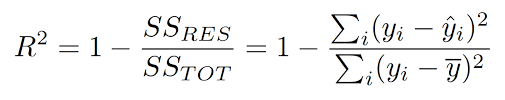

yi is the actual value. ycapi is the predicted values. ybar is the mean of the actual target value.

In [147]:
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [153]:
r2_score(y_predict,y_test)

0.2500000000000001

In [148]:
r2_score(y_test_mean,y_test)

0.0

In [149]:
r2_score(y_test,y_test)

1.0

In [375]:
x_test

,age
8,62
0,22
9,61
20,21
12,27
14,49


In [386]:
reg.predict(x_test)

array([1, 0, 1, 0, 0, 1], dtype=int64)

In [374]:
reg.predict_proba(x_test)

array([[0.06240744, 0.93759256],
       [0.87061311, 0.12938689],
       [0.06951067, 0.93048933],
       [0.8830661 , 0.1169339 ],
       [0.79073938, 0.20926062],
       [0.229803  , 0.770197  ]])

In [381]:
reg.predict_proba([[16]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.93078392, 0.06921608]])

In [385]:
reg.predict([[16]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [158]:
import pandas as pd

In [159]:
dd = pd.read_csv('HR_comma_sep.csv')

In [160]:
left = dd[dd['left']==1]
left.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [161]:
retained = dd[dd['left']==0]
retained.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low


In [162]:
dd.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [163]:
dd.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

<Axes: xlabel='salary'>

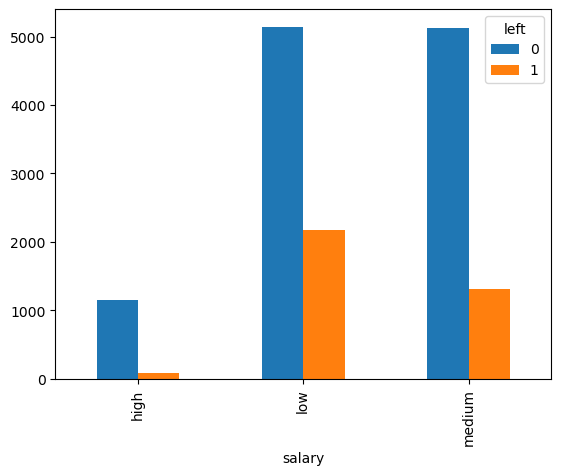

In [164]:
pd.crosstab(dd.salary,dd.left).plot(kind='bar')

In [165]:
subdf = dd[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
dff = pd.get_dummies(subdf['salary'], prefix = 'salary', dtype = 'int')
dff1 = pd.concat([subdf,dff], axis =1)
dff1.drop(['salary'], axis=1, inplace =True)
dff1

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [166]:
y = dd.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [167]:
x = dff1.drop(['salary_medium'], axis=1)

In [168]:
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [176]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
reg = linear_model.LogisticRegression()

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75)

In [172]:
reg.fit(x_train, y_train)

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [173]:
reg.score(x_train,y_train)

0.7763356742821584

In [174]:
reg.predict([[0.5,180,0,0,1]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [175]:
reg.predict_proba([[0.5,180,0,0,1]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.66348555, 0.33651445]])

In [462]:
from sklearn.datasets import load_digits

In [467]:
digit = load_digits()

In [468]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [579]:
digit.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [580]:
digit.target[1]

1

<Figure size 640x480 with 0 Axes>

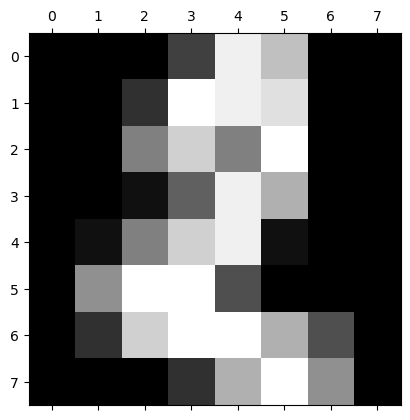

In [581]:
plt.gray()
plt.matshow(digit.images[2])

In [494]:
digit.DESCR[]

'.'

In [495]:
digit.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [496]:
digit.target[0]

0

In [565]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [514]:
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size = 0.2)

In [515]:
len(x_train)

1437

In [516]:
len(x_test)

360

In [566]:
reg = LogisticRegression()


In [567]:
reg.fit(x_train, y_train)

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [578]:
reg.predict([digit.data[5]])

array([5])

In [553]:
y_test

array([8, 3, 5, 8, 2, 7, 8, 6, 1, 0, 6, 8, 1, 3, 2, 1, 8, 8, 0, 7, 3, 0,
       5, 9, 1, 6, 7, 7, 6, 3, 7, 7, 2, 6, 5, 5, 1, 9, 4, 1, 2, 2, 6, 9,
       4, 0, 3, 0, 9, 9, 9, 1, 6, 0, 3, 2, 5, 5, 7, 2, 5, 4, 6, 1, 5, 0,
       1, 2, 7, 3, 7, 3, 3, 5, 5, 2, 2, 6, 4, 8, 3, 2, 3, 3, 7, 6, 7, 4,
       2, 9, 1, 8, 9, 1, 3, 7, 5, 2, 9, 5, 8, 6, 6, 4, 4, 4, 0, 1, 3, 7,
       3, 7, 7, 6, 3, 4, 0, 1, 1, 9, 9, 5, 0, 0, 7, 0, 3, 0, 4, 0, 1, 5,
       5, 2, 4, 8, 6, 2, 4, 9, 6, 0, 6, 5, 0, 9, 6, 6, 1, 4, 4, 6, 7, 9,
       0, 9, 2, 1, 4, 5, 3, 4, 4, 8, 6, 1, 0, 6, 3, 7, 9, 9, 1, 6, 9, 1,
       8, 4, 8, 8, 4, 7, 5, 0, 9, 7, 5, 1, 8, 5, 4, 5, 4, 2, 1, 4, 6, 5,
       6, 4, 1, 3, 8, 1, 5, 3, 3, 0, 5, 9, 6, 0, 2, 6, 0, 4, 5, 9, 1, 1,
       5, 2, 0, 9, 6, 2, 0, 7, 2, 2, 0, 2, 4, 8, 8, 3, 2, 9, 2, 6, 6, 1,
       4, 4, 1, 9, 9, 2, 5, 7, 4, 7, 3, 1, 6, 7, 1, 9, 4, 8, 2, 4, 1, 3,
       8, 5, 0, 9, 0, 8, 6, 3, 1, 0, 0, 5, 8, 8, 8, 3, 8, 3, 0, 2, 6, 0,
       4, 9, 8, 6, 1, 2, 5, 6, 3, 6, 6, 8, 1, 1, 7,

## Practice 3

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [1]:

from sklearn.datasets import load_iris


In [3]:
dat = load_iris()

In [592]:
dict(dat)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [593]:
dat.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [594]:
dat.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [595]:
dat.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [596]:
dat.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [598]:
dat.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [606]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [600]:
x_train, x_test, y_train, y_test = train_test_split(dat.data, dat.target, test_size = 0.2)

In [601]:
x_train.shape

(120, 4)

In [602]:
x_test.shape

(30, 4)

In [607]:
reg = LogisticRegression()

In [608]:
reg.fit(x_train, y_train)

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [612]:
y_predicted = reg.predict(x_test)

In [610]:
y_test

array([1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0])

In [611]:
reg.score(x_test, y_test)

0.9666666666666667

In [613]:
from sklearn.metrics import confusion_matrix

In [615]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  8]], dtype=int64)

In [616]:
x_train[0]

array([5.1, 2.5, 3. , 1.1])

In [20]:
## Logistic regression

In [ ]:
import seaborn as sns

In [11]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df = df[df['species']!='setosa']
df.head()
## we are working on binary clasification i.e. logistic regression so we are deleting one category.

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [13]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [14]:
# Mapping the feature names with 0 and 1
df['species'] = df['species'].map({'versicolor':0, 'virginica':1})
df['species']

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [16]:
x = df.iloc[:, 0:4]
y = df.species
y.head()

50    0
51    0
52    0
53    0
54    0
Name: species, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg

LogisticRegression()

## GRIDSEARCH

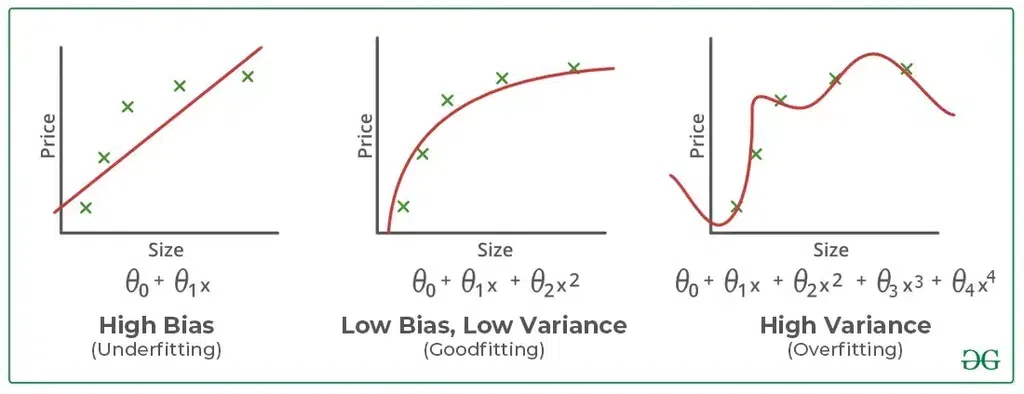

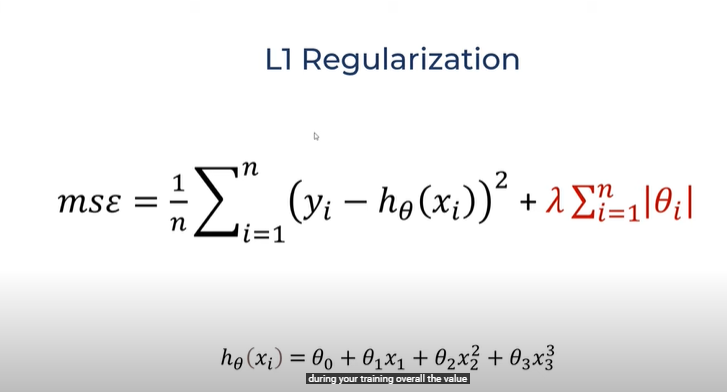
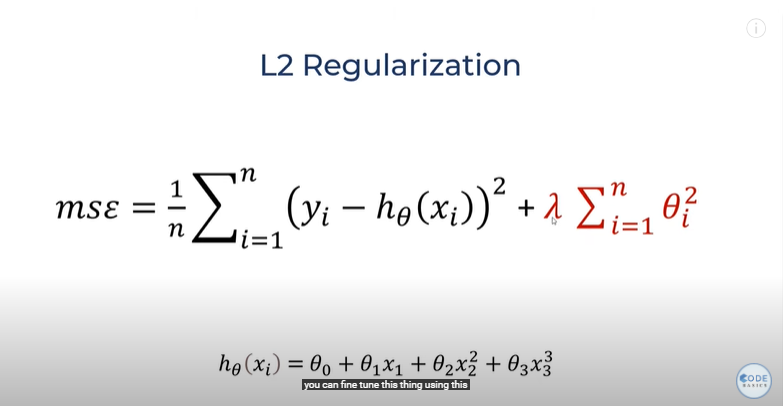


In [36]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l2','l1','elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40,50], 'max_iter':[100,200,300]}
#include the paramters on which you want to iterate. In above there will be total 99 combination and 99 test for best combination

In [21]:
clas_grid = GridSearchCV(reg, param_grid =parameters, scoring ='accuracy', cv=5 )
clas_grid
#scoring - which technique to be used to select the best model. In classification it is always 'accuracy' 
#but for linear regression it can be 'r2' or 'neg_root_mean_squared_error'

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [22]:
clas_grid.fit(X_train,y_train)

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Akash Patil\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [23]:
print(clas_grid.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [24]:
print(clas_grid.best_score_)

0.9733333333333334


In [25]:
y_predict = clas_grid.predict(X_test)
y_predict

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_predict,y_test)

0.92

In [30]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


In [33]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



C:\Users\Akash Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Akash Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Akash Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Akash Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

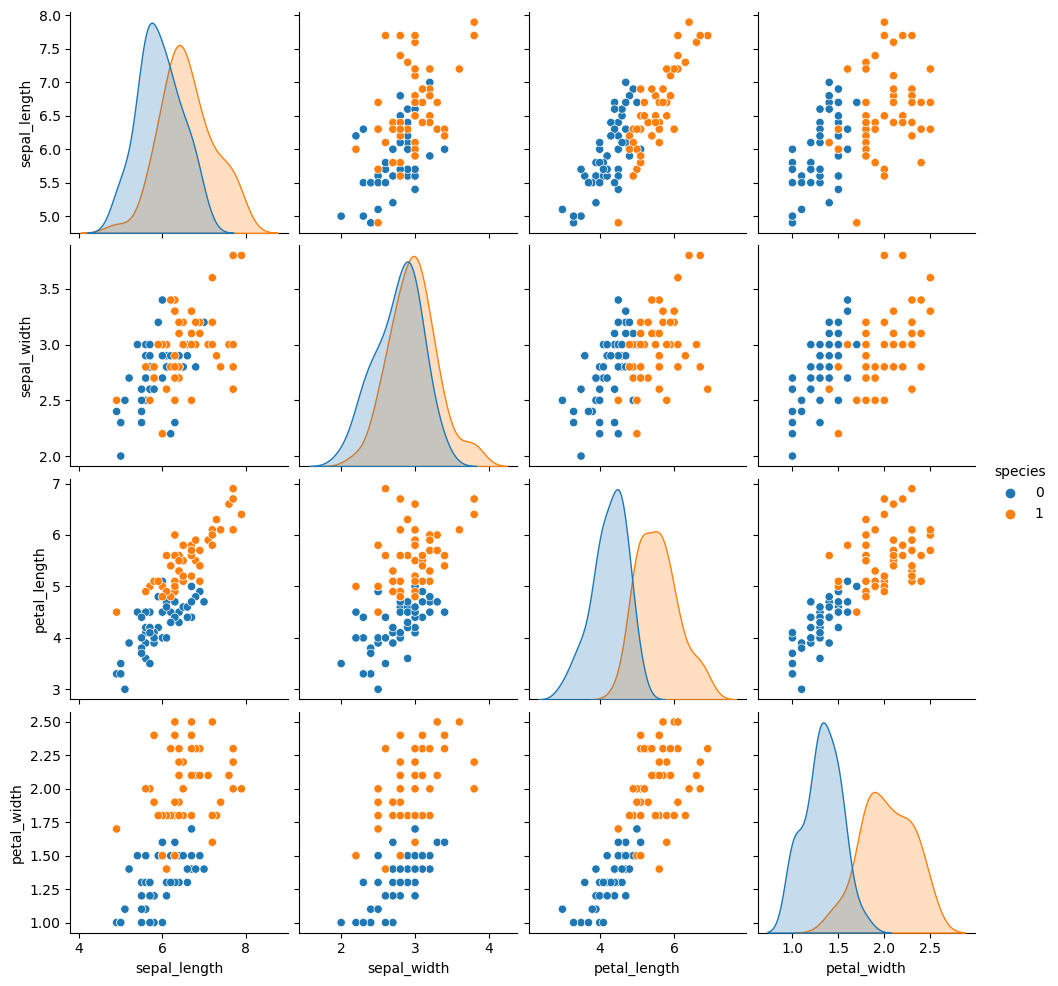

In [35]:
#EDA
sns.pairplot(df, hue='species')

## L1 and L2 Regularization in Linear Regression 

In [63]:
import pandas as pd
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [64]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
df = df[cols_to_use]

In [65]:
df.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [66]:
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())

In [67]:
df.dropna(inplace=True)

In [68]:
df = pd.get_dummies(df, drop_first=True, dtype = 'int')
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
x = df.drop(['Price'], axis = 1)
y = df['Price']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 2)

In [92]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

In [95]:
reg.score(X_test,y_test)

0.13853683161537644

In [96]:
reg.score(X_train,y_train)

0.6827792395792723

This Linear Regression model is overfir because it gives high percentage on train numbers and low percentage on test numbers.
Hence we need to do Regularization.

In [101]:
# Lasso regression is L1 regularization
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter = 100, tol = 0.1)

In [98]:
lasso_reg.fit(X_train,y_train)

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [99]:
lasso_reg.score(X_test,y_test)

0.6636111369404489

In [100]:
lasso_reg.score(X_train,y_train)

0.6766985624766824

In [105]:
## Ridge regularization is a L2 regularization
from sklearn.linear_model import Ridge
reidge_reg =  linear_model.Ridge(alpha=50, max_iter = 100, tol = 0.1)
reidge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [106]:
reidge_reg.score(X_test,y_test)

0.6670848945194958

In [107]:
reidge_reg.score(X_train,y_train)

0.6622376739684328

Now Test data and train data score are almost similar. Model is fit.

In [110]:
## Practice 2

In [145]:
from sklearn.datasets import load_iris
import numpy as np

In [124]:
df = load_iris()

In [125]:
dict(df)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [130]:
data = pd.DataFrame(df.data)
data.columns = df.feature_names
data['target'] = df.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [133]:
x = data.iloc[:, :-1]
y = data.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [143]:
lin_reg = LinearRegression()
mse = cross_val_score(lin_reg, X_train,y_train, scoring = 'neg_mean_squared_error', cv=5)
mse
#Crossvalidation created 5 different sets of data from X_train = X_training_data(4/5) + (1/5)x_validation and gives the mse value

array([-0.05105182, -0.03875948, -0.07217493, -0.05906597, -0.05534152])

In [146]:
mean_mse = np.mean(mse)
mean_mse

-0.05527874467416651

In [153]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [149]:
ridge = Ridge()
parameters={'alpha':[0,1,2,3,5,10,20,30,40,50,100,200,300]}
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 1, 2, 3, 5, 10, 20, 30, 40, 50, 100, 200,
                                   300]},
             scoring='neg_mean_squared_error')

In [150]:
ridge_reg.best_params_

{'alpha': 2}

In [151]:
ridge_reg.best_score_

-0.054378558467135366

In [157]:
lass = Lasso()
parameters={'alpha':[1e-15,1e-10,1e-5,1e-3,1e-2,0,1,2,3,5,10,20,30,40,50,100,200,300]}
lass_reg = GridSearchCV(lass, parameters, scoring = 'neg_mean_squared_error', cv=5)
lass_reg.fit(X_train,y_train)

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.342e+00, tolerance: 6.291e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 0, 1, 2, 3,
                                   5, 10, 20, 30, 40, 50, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [158]:
lass_reg.best_params_

{'alpha': 1e-05}

In [159]:
lass_reg.best_score_

-0.05527835162579229

## Practice 4

In [280]:
import pandas as pd
import matplotlib.pyplot as plt

In [281]:
df = pd.read_csv('titanic.csv')

In [282]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived'>

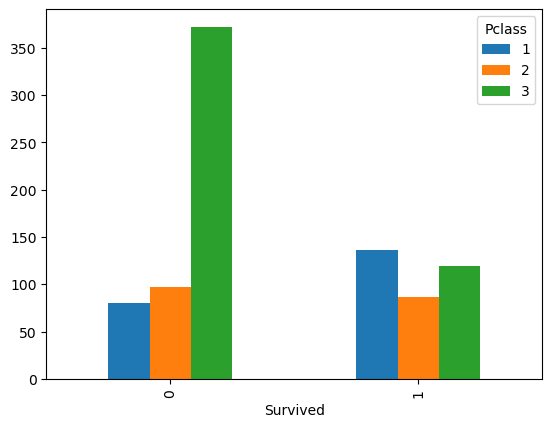

In [283]:
pd.crosstab(df['Survived'], df['Pclass']).plot(kind = 'bar')

<Axes: xlabel='Survived'>

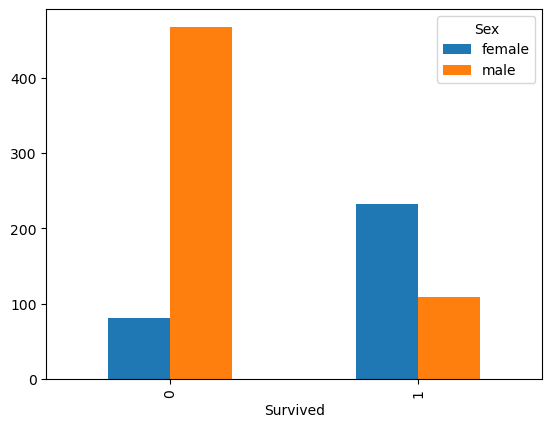

In [284]:
pd.crosstab(df['Survived'],df['Sex']).plot(kind = 'bar')

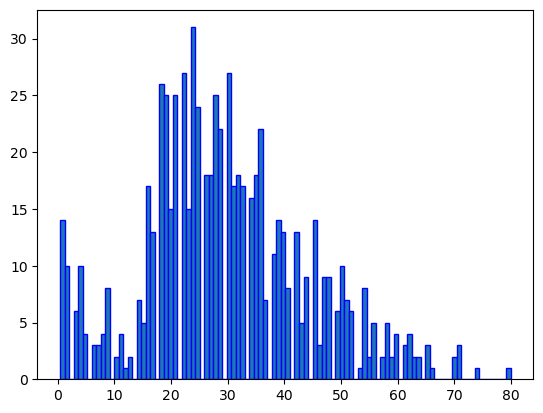

In [285]:
plt.hist(df['Age'], edgecolor ='b', bins = 100)
plt.show()

In [286]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: title={'center': 'Age'}, xlabel='Pclass'>

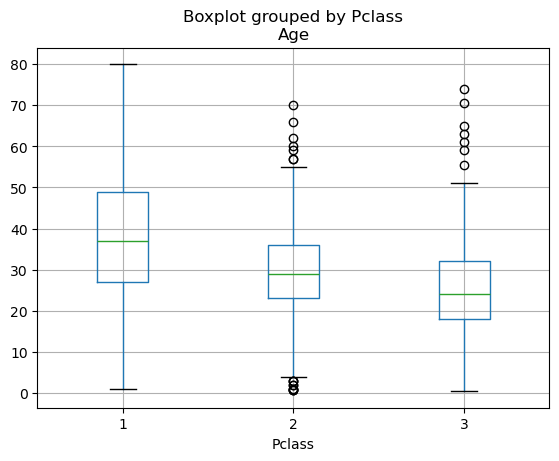

In [287]:
df.boxplot(column = 'Age', by = 'Pclass')

In [288]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [289]:
df.drop('Cabin', axis =1, inplace = True)

In [290]:
df.dropna(inplace = True)

In [291]:
sex = pd.get_dummies(df['Sex'], dtype = 'int', drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [292]:
em = pd.get_dummies(df['Embarked'], dtype = 'int', drop_first = True)
em.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [293]:
pcls = pd.get_dummies(df['Pclass'], dtype = 'int', drop_first = True).rename(columns = {2:'c2',3:'c3'})
pcls.head()

,c2,c3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [294]:
df1 = pd.concat([df,sex,em, pcls], axis =1)
df1.drop(['Pclass','Embarked','Sex', 'Name', 'Ticket', 'PassengerId'], axis =1, inplace = True)
df1.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,c2,c3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [295]:
len(df1)

712

In [296]:
x=df1.drop('Survived', axis=1)
y = df1['Survived']

In [297]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Age       712 non-null    float64
 2   SibSp     712 non-null    int64  
 3   Parch     712 non-null    int64  
 4   Fare      712 non-null    float64
 5   male      712 non-null    int32  
 6   Q         712 non-null    int32  
 7   S         712 non-null    int32  
 8   c2        712 non-null    int32  
 9   c3        712 non-null    int32  
dtypes: float64(2), int32(5), int64(3)
memory usage: 47.3 KB


In [298]:
from sklearn.model_selection import train_test_split

In [299]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 1)

In [300]:
y_train

830    1
566    0
149    0
106    1
290    1
      ..
182    0
809    1
94     0
292    0
51     0
Name: Survived, Length: 569, dtype: int64

In [301]:
from sklearn.linear_model import LogisticRegression

In [302]:
model = LogisticRegression()

In [303]:
model.fit(x_train, y_train)

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [304]:
model.score(x_test,y_test)

0.7552447552447552

In [305]:
model.score(x_train,y_train)

0.8084358523725835

In [335]:
y_pre = model.predict(x_test)

In [336]:
df1.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,c2,c3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0


In [351]:
 model.predict([[90,0,1,1989,1,0,1,0,0]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [310]:
from sklearn.metrics import confusion_matrix

In [322]:
can = confusion_matrix(y_test, y_pre)
can

array([[67, 18],
       [17, 41]], dtype=int64)

In [323]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pre)

0.7552447552447552

In [325]:
from sklearn.preprocessing import StandardScaler

In [329]:
sc = StandardScaler()
x2 = sc.fit_transform(x_train)
x2[0]

array([-1.01653457,  0.5299497 , -0.49457176, -0.38915815, -1.3530875 ,
       -0.20984923, -1.80174045, -0.56584946,  1.03033694])

In [334]:
x_train.iloc[0]

Age      15.0000
SibSp     1.0000
Parch     0.0000
Fare     14.4542
male      0.0000
Q         0.0000
S         0.0000
c2        0.0000
c3        1.0000
Name: 830, dtype: float64